In [61]:
from konlpy.tag import Okt
okt=Okt()
text="나는 학교에 갔습니다."

#형태소 단위로 나눔
rst=okt.morphs("나는 학교에 갔습니다.", stem=True)  #stem=True: 동사를 원형으로 바꿈
print(rst)

#품사 태깅
rst=okt.pos(text, stem=True, join=True)
print(rst)

#명사추출
rst=okt.nouns(text)
print(rst)

#정규화(텍스트에서 불필요한 부분 정리)
rst=okt.normalize("그래욬ㅋㅋ")
print(rst)

#어구(특정한 의미 지닌 단어들 모임)
rst=okt.phrases("엄청난 폭우가 서울에 내렸습니다. 도로가 물에 잠겼어요")
print(rst)

['나', '는', '학교', '에', '가다', '.']
['나/Noun', '는/Josa', '학교/Noun', '에/Josa', '가다/Verb', './Punctuation']
['나', '학교']
그래요ㅋㅋ
['엄청난 폭우', '서울', '도로', '폭우']


In [71]:
from konlpy.tag import Okt
okt=Okt()
text = "인공지능과 자연어처리 기술이 발전하고 있습니다. 인공 지능과 기계 학습도 중요합니다. 인공지능이 인공지능합니다."
tokens=text.split()
# print(tokens)

combined_nouns=[]
current_combined=""

for token in tokens:
    nouns=okt.nouns(token)
    print(nouns)
    for noun in nouns:
        if current_combined:
            current_combined+=noun
        else:
            current_combined=noun
            
        if not (current_combined and (nouns.index(noun) < len(nouns)-1)):
            combined_nouns.append(current_combined)
            current_combined=""

if current_combined:
    combined_nouns.append(current_combined)
print("*"*50)
print(combined_nouns)

['인공', '지능']
['자연어', '처리']
['기술']
['발전']
[]
['인공']
['지능']
['기계']
['학습']
[]
['인공', '지능']
['인공', '지능']
**************************************************
['인공지능', '자연어처리', '기술', '발전', '인공', '지능', '기계', '학습', '인공지능', '인공지능']


### 워드 클라우드

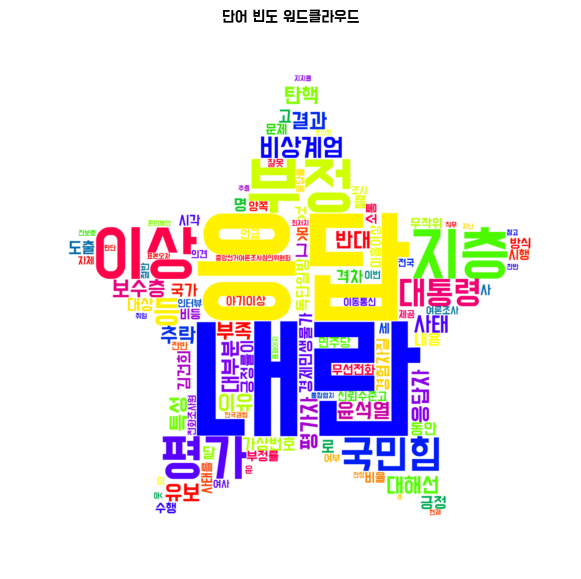

In [102]:
#오늘 뉴스 기사 워드 클라우드
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image

def get_compound_nouns(text):

    okt = Okt()
    tokens = text.split()
    combined_nouns = []
    current_combined = ""

    for token in tokens:
        nouns = okt.nouns(token)

        for noun in nouns:
            if current_combined:
                current_combined += noun
            else:
                current_combined = noun

            if not (current_combined and (nouns.index(noun) < len(nouns) - 1)):
                combined_nouns.append(current_combined)
                current_combined = ""

    if current_combined:
        combined_nouns.append(current_combined)

    return combined_nouns

#한글 세팅(워드클라우드, 맵플로립)
fontpath=r"C:\Users\enjoy\python_202412\fonts\DoHyeon-Regular.ttf"
font_manager.fontManager.addfont(fontpath)
plt.rc('font',family='Do Hyeon')
plt.rcParams['axes.unicode_minus']=False

text = """윤석열 대통령 지지율이 11%로 추락했다. 취임 후 긍정 평가가 최저치로 추락한 것이다. 부정 평가는 85%에 달했는데, 부정 평가자 절반 이상이 ‘비상계엄 사태’를 이유로 언급했다.
한국갤럽은 지난 10일부터 12일까지 3일 동안 전국 18세 이상 1002명을 대상으로 시행한 자체 여론조사 결과 이같은 결과가 도출됐다고 13일 밝혔다.
대부분의 응답자 특성에서 윤 대통령이 현재 ‘잘못하고 있다’는 평가가 많았다. 특히 더불어민주당 지지층, 진보층, 20~50대 등에서는 그 비율이 90%를 웃돌았다. 국민의힘 지지층에서도 긍정률(38%)이 부정률(53%)에 못 미쳤다.
직무 수행 부정 평가자는 ‘비상계엄 사태’(49%), ‘경제·민생·물가’(8%), ‘전반적으로 잘못한다’(6%), ‘경험·자질 부족·무능함’, ‘독단적·일방적’, ‘소통 미흡’(이상 5%), ‘통합·협치 부족’, ‘김건희 여사 문제’, ‘국가 혼란·불안 야기’(이상 2%) 등을 부정 평가의 이유로 들었다.
응답자들은 윤석열 대통령 탄핵에 대해선 75%가 찬성, 21%가 반대했다. 4%는 의견을 유보했다. 국민의힘 지지층에서만 유일하게 탄핵 반대(66%)가 우세하고, 70대 이상, 보수층 등에서는 찬반 격차가 크지 않았다.
응답자들은 비상계엄 사태가 내란인지 여부에 대해선 71%가 내란이라고 응답했다. ‘내란이 아니다’고 응답한 응답자는 23%였다. 6%는 판단을 유보했다. 대부분의 응답자 특성에서 내란이란 시각이 우세했지만, 국민의힘 지지층 68%는 내란이 아니라고 봤다. 70대 이상과 보수층에서는 양쪽이 비등했다.
이번 조사는 이동통신 3사 제공 무선전화 가상번호를 무작위 추출해 전화조사원 인터뷰(CATI) 방식으로 이뤄졌다. 표본오차는 3.1%포인트(95% 신뢰수준)고, 응답률은 15.8%다. 자세한 내용은 중앙선거여론조사심의위원회 홈페이지를 참고하면 된다."""

words=get_compound_nouns(text)
# print(words)

unique_words, counts=np.unique(words, return_counts=True)
freq=dict(zip(unique_words, counts))

# print(freq)

mask_image=np.array(Image.open('star.jpg'))

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    font_path=fontpath,  # Windows의 한글 폰트 경로
    mask=mask_image,
    contour_color='white',  #경계선 색
    contour_width=1,
    colormap='prism'
).generate_from_frequencies(freq)

# WordCloud 시각화
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('단어 빈도 워드클라우드')
plt.show()

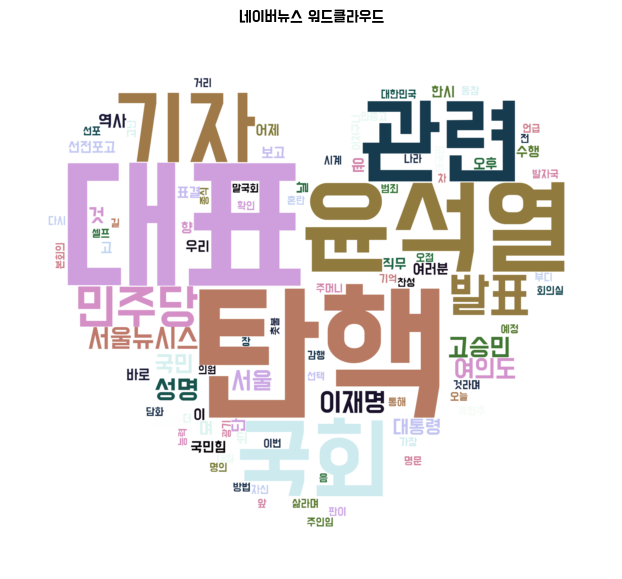

In [147]:
#뉴스 기사(제목,내용) 크롤링해서 워드 클라우드
# https://www.flaticon.com/icon-fonts-most-downloaded?weight=solid&type=uicon    #아이콘 사이트
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image

url="https://n.news.naver.com/mnews/hotissue/article/003/0012959761?type=series&cid=1088290"
response=requests.get(url)
soup=BeautifulSoup(response.text,'html.parser')

title=soup.select_one("#title_area").text.strip()  #제목추출
content=soup.select_one("#dic_area").text.strip()  #본문추출

def get_compound_nouns(text):

    okt = Okt()
    tokens = text.split()
    combined_nouns = []
    current_combined = ""

    for token in tokens:
        nouns = okt.nouns(token)

        for noun in nouns:
            if current_combined:
                current_combined += noun
            else:
                current_combined = noun

            if not (current_combined and (nouns.index(noun) < len(nouns) - 1)):
                combined_nouns.append(current_combined)
                current_combined = ""

    if current_combined:
        combined_nouns.append(current_combined)

    return combined_nouns

#한글 세팅(워드클라우드, 맵플로립)
fontpath=r"C:\Users\enjoy\python_202412\fonts\DoHyeon-Regular.ttf"
font_manager.fontManager.addfont(fontpath)
plt.rc('font',family='Do Hyeon')
plt.rcParams['axes.unicode_minus']=False

words=get_compound_nouns(content)
# print(words)

unique_words, counts=np.unique(words, return_counts=True)
freq=dict(zip(unique_words, counts))

# print(freq)

mask_image=np.array(Image.open('heart.jpg'))

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    font_path=fontpath,  # Windows의 한글 폰트 경로
    mask=mask_image,
    contour_color='white',  #경계선 색
    contour_width=1,
    colormap='cubehelix'
).generate_from_frequencies(freq)

# WordCloud 시각화
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('네이버뉴스 워드클라우드')
# plt.saveImg('워드클라우드.png',bbox_inches='tight')  #이미지로 저장
plt.show()

In [153]:
from konlpy.tag import Okt
okt=Okt()
text="엄청난 폭우가 서울에 내렸습니다. 도로가 물에 잠겼어요ㅠㅠ"
tagged=okt.pos(text,stem=True)
print(tagged)

#동사추출
verbs=[word for word, pos in tagged if pos=='Verb']
print("동사:", verbs)

#형용사추출
adjectives=[word for word, pos in tagged if pos=='Adjective']
print("형용사:", adjectives)

#부사추출
adverbs=[word for word, pos in tagged if pos=='Adverb']
print("부사:", adverbs)

#조사추출
josas=[word for word, pos in tagged if pos=='Josa']
print("조사:", josas)

[('엄청나다', 'Adjective'), ('폭우', 'Noun'), ('가', 'Josa'), ('서울', 'Noun'), ('에', 'Josa'), ('내리다', 'Verb'), ('.', 'Punctuation'), ('도로', 'Noun'), ('가', 'Josa'), ('물', 'Noun'), ('에', 'Josa'), ('잠기다', 'Verb'), ('ㅠㅠ', 'KoreanParticle')]
동사: ['내리다', '잠기다']
형용사: ['엄청나다']
부사: []
조사: ['가', '에', '가', '에']


### okt.normalize

In [170]:
okt=Okt()

#축약어 정규화
text1="그래욤ㅋㅋ"
print(okt.normalize(text1))

#빈복 문자 정규화
text2="진짜aeeeeeee완전완전완전완전대박대박귀엽다!!!!!"
print(okt.normalize(text2))

#이모티콘 정규화
text3="앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ하하하하하하하ㅏ하핳하하하하하핳하하하웃겨"
print(okt.normalize(text3))

#복합적 예시
text4="안녕하세욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ짱 좋아요!!!!!!!!!!!!!!!!!"
print(okt.normalize(text4)) ㅍ

그래요ㅋㅋ
진짜aeeeeeee완전완전대박대박귀엽다!!!!!
아ㅋㅋㅋ하하하ㅏ하핳하하하핳하하하웃겨
안녕하세요ㅋㅋㅋ짱 좋아요!!!!!!!!!!!!!!!!!


### 판다스
- 결측치, 중복, 불균형 데이터와 같이 잘못된 값을 포함하는 행을 한번에 삭제, 변경 가능

In [179]:
import pandas as pd

city={
    '도시':['서울','부산','울산'],
    '인구':[940,330,110]
}
df=pd.DataFrame(city)
df

,도시,인구
0,서울,940
1,부산,330
2,울산,110


In [184]:
city=['서울','부산','울산']
df=pd.Series(city)
df

0    서울
1    부산
2    울산
dtype: object

In [186]:
df=pd.Series(city, index=['a','b','c'])
df

a    서울
b    부산
c    울산
dtype: object

In [189]:
import pandas as pd
city={'서울':940, '부산':330, '울산':110}
df=pd.Series(city)
df

서울    940
부산    330
울산    110
dtype: int64

In [192]:
data=[10,20,30,40]
index=['a','b','c','d']
series=pd.Series(data,index=index)
print(series)

a    10
b    20
c    30
d    40
dtype: int64


In [196]:
#기본통계량계산
print("Mean:", series.mean())
print("Sum:", series.sum())
print("Max:", series.max())
print("Standard Deviation:", series.std())

Mean: 25.0
Sum: 100
Max: 40
Standard Deviation: 12.909944487358056


In [200]:
#원소 접근
series['c']

30

In [202]:
#특정조건 요소 선택
filtered=series[series>20]
print(filtered)

c    30
d    40
dtype: int64


In [205]:
#원소 추가
series['e']=50
print(series)

a    10
b    20
c    30
d    40
e    50
dtype: int64


In [207]:
#원소삭제
series=series.drop('a')
print(series)

b    20
c    30
d    40
e    50
dtype: int64


In [210]:
#시리즈간 연산
data2=[5,15,25,35]
series2=pd.Series(data2, index=['b','c','d','e'])
result=series+series2
print(result)

b    25
c    45
d    65
e    85
dtype: int64


In [218]:
date_range=pd.date_range(start='2023-01-01',periods=5)
date_range

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')

In [220]:
time_series=pd.Series([1,3,5,7,9], index=date_range)
time_series

2023-01-01    1
2023-01-02    3
2023-01-03    5
2023-01-04    7
2023-01-05    9
Freq: D, dtype: int64

#### 판다스 데이터프레임
- 2차원 배열사용
- 딕셔너리형태의 데이터로 데이터프레임 만들 수 있음
- 두개의 시리즈가 모여서 데이터프레임 형성하는 것과 같음
- 딕셔너리의 키 값은 컬럼명(필드명)으로 생성

In [231]:
import pandas as pd

city={
    '도시':['서울','부산','울산'],
    '인구':[940,330,110]
}
df=pd.DataFrame(city)
df

,도시,인구
0,서울,940
1,부산,330
2,울산,110


In [233]:
df['도시']

0    서울
1    부산
2    울산
Name: 도시, dtype: object

In [235]:
df.loc[0]   #0이면 시리즈형태로 불러옴

도시     서울
인구    940
Name: 0, dtype: object

In [239]:
df.loc[[0,1,2]]

,도시,인구
0,서울,940
1,부산,330
2,울산,110


In [253]:
data = [['김민재', 27, 75, 5428000],
        ['이강인', 22, 57, 3428000],
        ['박찬호', 50, 91, 8428000],
        ['차범근', 70, 80, 4428000],
        ['추신수', 43, 100, 4528000],
        ['손흥민', 31, 72, 7028000],
        ['황희찬', 28, 69, 2528000]]
df=pd.DataFrame(data,columns=['성명','나이','몸무게','급여'])
df

,성명,나이,몸무게,급여
0,김민재,27,75,5428000
1,이강인,22,57,3428000
2,박찬호,50,91,8428000
3,차범근,70,80,4428000
4,추신수,43,100,4528000
5,손흥민,31,72,7028000
6,황희찬,28,69,2528000


In [255]:
df['성명']

0    김민재
1    이강인
2    박찬호
3    차범근
4    추신수
5    손흥민
6    황희찬
Name: 성명, dtype: object

In [262]:
df[['성명','급여']]  #두개이상은 반드시 [[]]로

,성명,급여
0,김민재,5428000
1,이강인,3428000
2,박찬호,8428000
3,차범근,4428000
4,추신수,4528000
5,손흥민,7028000
6,황희찬,2528000


In [265]:
df.loc[[1]]

,성명,나이,몸무게,급여
1,이강인,22,57,3428000


### loc:location의 약자로 하나 이상의 지정된 행과열
- loc[행]
- loc[행, 열]

In [271]:
df.loc[0:2, ['성명','나이']]

,성명,나이
0,김민재,27
1,이강인,22
2,박찬호,50


In [275]:
df.loc[0:3]

,성명,나이,몸무게,급여
0,김민재,27,75,5428000
1,이강인,22,57,3428000
2,박찬호,50,91,8428000
3,차범근,70,80,4428000


In [277]:
df.iloc[0:3]

,성명,나이,몸무게,급여
0,김민재,27,75,5428000
1,이강인,22,57,3428000
2,박찬호,50,91,8428000


In [282]:
df.loc[0,'급여']   #df.iloc[0,3]

5428000

In [285]:
df.loc[[0,1,3],['성명','급여']]   #df.iloc[[0,1,3],[0,3]]

,성명,급여
0,김민재,5428000
1,이강인,3428000
3,차범근,4428000


In [289]:
df.loc[0:3, '성명':'급여']

,성명,나이,몸무게,급여
0,김민재,27,75,5428000
1,이강인,22,57,3428000
2,박찬호,50,91,8428000
3,차범근,70,80,4428000


In [293]:
df.iloc[:3,:2]

,성명,나이
0,김민재,27
1,이강인,22
2,박찬호,50


In [295]:
#급여 컬럼이 5백만원 이상인 행
df.loc[df['급여']>=5000000]

,성명,나이,몸무게,급여
0,김민재,27,75,5428000
2,박찬호,50,91,8428000
5,손흥민,31,72,7028000


In [297]:
df.loc[(df['나이']>=30) & (df['나이']<=35)]

,성명,나이,몸무게,급여
5,손흥민,31,72,7028000


In [301]:
df.loc[df['급여']>=5000000, '성명':'몸무게']

,성명,나이,몸무게
0,김민재,27,75
2,박찬호,50,91
5,손흥민,31,72


In [303]:
df['체질량']=''
df

,성명,나이,몸무게,급여,체질량
0,김민재,27,75,5428000,
1,이강인,22,57,3428000,
2,박찬호,50,91,8428000,
3,차범근,70,80,4428000,
4,추신수,43,100,4528000,
5,손흥민,31,72,7028000,
6,황희찬,28,69,2528000,


In [311]:
df.loc[df['몸무게']>80,['체질량']]='비만'
df

,성명,나이,몸무게,급여,체질량
0,김민재,27,75,5428000,
1,이강인,22,57,3428000,
2,박찬호,50,91,8428000,비만
3,차범근,70,80,4428000,
4,추신수,43,100,4528000,비만
5,손흥민,31,72,7028000,
6,황희찬,28,69,2528000,


### df.drop:특정행과 컬럼을 삭제
- axis=0:열
- axis=1:행

In [316]:
df2=df.drop(['몸무게','체질량'],axis=1)  #원본데이터 변경X
df2

,성명,나이,급여
0,김민재,27,5428000
1,이강인,22,3428000
2,박찬호,50,8428000
3,차범근,70,4428000
4,추신수,43,4528000
5,손흥민,31,7028000
6,황희찬,28,2528000


In [318]:
df.drop(['몸무게','체질량'],axis=1, inplace=True) #원본데이터에서 몸무게, 체질량 완전 삭제
df

,성명,나이,급여
0,김민재,27,5428000
1,이강인,22,3428000
2,박찬호,50,8428000
3,차범근,70,4428000
4,추신수,43,4528000
5,손흥민,31,7028000
6,황희찬,28,2528000


In [322]:
df.drop(df.index[1:2])

,성명,나이,급여
0,김민재,27,5428000
2,박찬호,50,8428000
3,차범근,70,4428000
4,추신수,43,4528000
5,손흥민,31,7028000
6,황희찬,28,2528000


In [324]:
df.drop(df.iloc[2:4].index)  #행범위 지정해서 삭제

,성명,나이,급여
0,김민재,27,5428000
1,이강인,22,3428000
4,추신수,43,4528000
5,손흥민,31,7028000
6,황희찬,28,2528000


In [328]:
df.iloc[:, [0,1]]

,성명,나이
0,김민재,27
1,이강인,22
2,박찬호,50
3,차범근,70
4,추신수,43
5,손흥민,31
6,황희찬,28


In [2]:
import pandas as pd

data = ['김예찬, m, 부장, 010-1234-5678, 서울시 강남구 삼성동',
        '이하은, f, 인턴, 010-8765-4321, 부산시 해운대구 우동',
        '박지현, f, 과장, 010-1357-2468, 대구시 수성구 범어동',
        '최준호, m, 임시, 010-1928-3746, 인천시 연수구 송도동',
        '김예서, f, 과장, 010-2846-5937, 천안시 서북구 두정동']

df = pd.DataFrame(data, columns=['직원데이터'])

In [6]:
df=df['직원데이터'].str.split(',',expand=True)

In [8]:
df.columns=['성명','성별','직급','전화번호','주소']
df

,성명,성별,직급,전화번호,주소
0,김예찬,m,부장,010-1234-5678,서울시 강남구 삼성동
1,이하은,f,인턴,010-8765-4321,부산시 해운대구 우동
2,박지현,f,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,m,임시,010-1928-3746,인천시 연수구 송도동
4,김예서,f,과장,010-2846-5937,천안시 서북구 두정동


In [10]:
# 성별 열을 문자열로 변환 후 대문자로 변경
df['성별'] = df['성별'].str.upper()
df

,성명,성별,직급,전화번호,주소
0,김예찬,M,부장,010-1234-5678,서울시 강남구 삼성동
1,이하은,F,인턴,010-8765-4321,부산시 해운대구 우동
2,박지현,F,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,M,임시,010-1928-3746,인천시 연수구 송도동
4,김예서,F,과장,010-2846-5937,천안시 서북구 두정동


In [383]:
df['성별']=df['성별'].str.replace('M','Male')
df

,성명,성별,직급,전화번호,주소
0,김예찬,Male,부장,010-1234-5678,서울시 강남구 삼성동
1,이하운,F,인턴,010-8765-4321,부산시 해운대구 우동
2,박지현,F,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,Male,임시,010-1928-3746,인천시 연수구 송도동
4,김예서,F,과장,010-2846-5937,천안시 서북구 두정동


In [385]:
df['성별']=df['성별'].str.replace('F','Female')
df

,성명,성별,직급,전화번호,주소
0,김예찬,Male,부장,010-1234-5678,서울시 강남구 삼성동
1,이하운,Female,인턴,010-8765-4321,부산시 해운대구 우동
2,박지현,Female,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,Male,임시,010-1928-3746,인천시 연수구 송도동
4,김예서,Female,과장,010-2846-5937,천안시 서북구 두정동


In [395]:
df['성별']=df['성별'].str.replace('Male','남성').str.replace('Female','여성')
df

,성명,성별,직급,전화번호,주소
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동
1,이하운,여성,인턴,010-8765-4321,부산시 해운대구 우동
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,남성,임시,010-1928-3746,인천시 연수구 송도동
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동


In [399]:
df['직급']=df['직급'].str.replace('인턴|임시','사원',regex=True)
df

,성명,성별,직급,전화번호,주소
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,남성,사원,010-1928-3746,인천시 연수구 송도동
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동


In [401]:
df['성별'].str.contains("여성")

0    False
1     True
2     True
3    False
4     True
Name: 성별, dtype: bool

In [403]:
df[df['성별'].str.contains('여성')]

,성명,성별,직급,전화번호,주소
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동


In [405]:
df['관리자']=df['직급'].str.contains('과장')
df

,성명,성별,직급,전화번호,주소,관리자
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동,False
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동,False
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동,True
3,최준호,남성,사원,010-1928-3746,인천시 연수구 송도동,False
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동,True


In [407]:
df[df['관리자']==True]

,성명,성별,직급,전화번호,주소,관리자
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동,True
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동,True


In [409]:
df=df.drop(columns='관리자')
df

,성명,성별,직급,전화번호,주소
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동
3,최준호,남성,사원,010-1928-3746,인천시 연수구 송도동
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동


In [411]:
df['주소'].str[:4]

0    서울시 
1    부산시 
2    대구시 
3    인천시 
4    천안시 
Name: 주소, dtype: object

In [415]:
df['도시']=df['주소'].str[:4]
df

,성명,성별,직급,전화번호,주소,도시
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동,서울시
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동,부산시
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동,대구시
3,최준호,남성,사원,010-1928-3746,인천시 연수구 송도동,인천시
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동,천안시


In [417]:
df['주소']=df['주소'].str.strip()
df

,성명,성별,직급,전화번호,주소,도시
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동,서울시
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동,부산시
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동,대구시
3,최준호,남성,사원,010-1928-3746,인천시 연수구 송도동,인천시
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동,천안시


In [421]:
df['주소'].str.split(' ',expand=True)

,0,1,2
0,서울시,강남구,삼성동
1,부산시,해운대구,우동
2,대구시,수성구,범어동
3,인천시,연수구,송도동
4,천안시,서북구,두정동


In [423]:
df[['시','구','동']]=df['주소'].str.split(' ', expand=True)
df

,성명,성별,직급,전화번호,주소,도시,시,구,동
0,김예찬,남성,부장,010-1234-5678,서울시 강남구 삼성동,서울시,서울시,강남구,삼성동
1,이하운,여성,사원,010-8765-4321,부산시 해운대구 우동,부산시,부산시,해운대구,우동
2,박지현,여성,과장,010-1357-2468,대구시 수성구 범어동,대구시,대구시,수성구,범어동
3,최준호,남성,사원,010-1928-3746,인천시 연수구 송도동,인천시,인천시,연수구,송도동
4,김예서,여성,과장,010-2846-5937,천안시 서북구 두정동,천안시,천안시,서북구,두정동


#### 판다스 호출가능 파일형식
|파일형식|Reader|Writer|
|---|---|---|
| CSV    | read_csv    | to_csv|
| EXCEL    | read_excel    | to_excel|
| HTML    | read_html    | to_html|
| JSON    | read_json    | to_json|
| SQL    | read_sql    | to_sql|